In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.datasets import make_regression
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

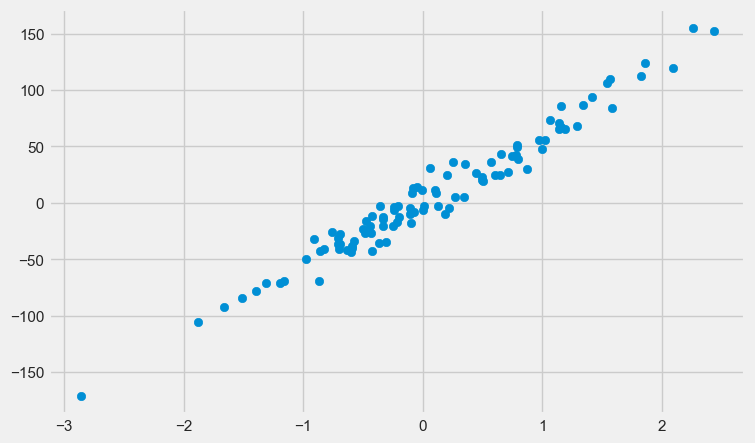

In [106]:
#Dataset
np.random.seed(5)
n = 1
m = 100 #dimensions

x , y = make_regression(n_samples=m, n_features=n, noise=10)
plt.scatter(x,y)


In [107]:
#add bias
X = np.hstack((np.ones(x.shape),x))
print('dim X :' ,X.shape)
y= y.reshape(y.shape[0],1) #sinon dim y: (100,)
print('dim y :', y.shape)

dim X : (100, 2)
dim y : (100, 1)


In [108]:
#model linéaire
def model(X, theta):
    return X.dot(theta) #theta : vecteur qui contient a et b de la fonction linéaire

#fonction cost, least square
def cost (X, y, theta):
    J= 1/(2*m)*np.sum((model(X, theta)-y)**2)
    return J

#gradient
def gradient(X, y, theta):
    return 1/m * X.T.dot((X.dot(theta) - y))

#gradient descent
def GD(X, y, theta, learning_rate, itt):
    cost_hist = np.zeros(itt)
    theta_hist = np.zeros((itt,2))

    for i in range (0,itt):
        prediction = model(X, theta)
        theta = theta - learning_rate*gradient(X, y, theta) #descente du gradient en fonction du learning rate
        cost_hist[i]= cost(X, y, theta)
        theta_hist[i,:]= theta.T

    return theta, cost_hist, theta_hist

In [109]:
#ini
np.random.seed(0)
theta = np.random.randn(2,1)
itt=10
theta, cost_hist, theta_hist = GD(X,y,theta, learning_rate=0.3, itt=itt)

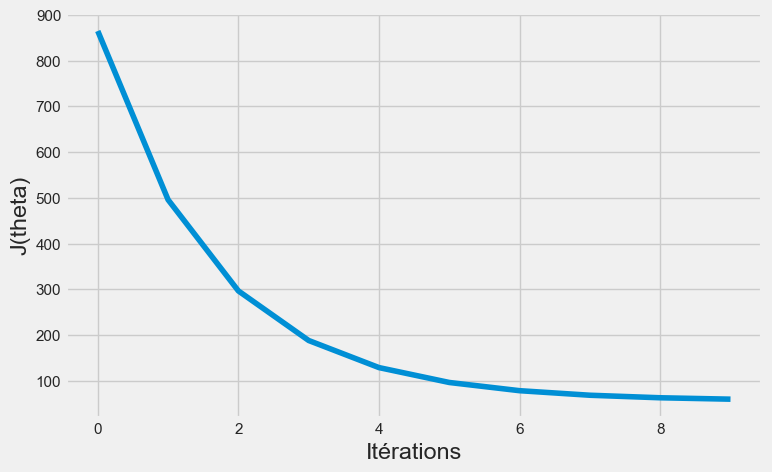

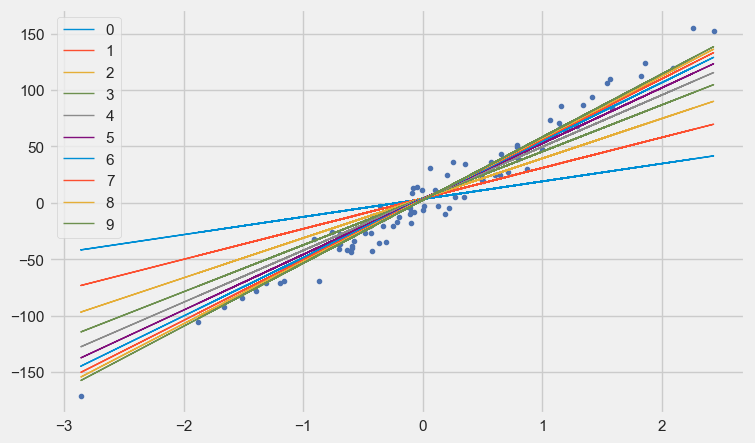

In [111]:
#courbes d'apprentissages
fig,ax = plt.subplots()
ax.set_ylabel('J(theta)')
ax.set_xlabel('Itérations')
cout = ax.plot(range(itt),cost_hist)

#evolution modèle
fig,ax = plt.subplots()
evol =ax.plot(x,y, 'b.')
for i in range(itt):
    evol = ax.plot(x, model(X, theta_hist[i]), lw=1, label=i)
    ax.legend()